In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
titanic = pd.read_csv("C:/Users/HN362WS/Music/Udemy Python/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking for missing values 

<Axes: >

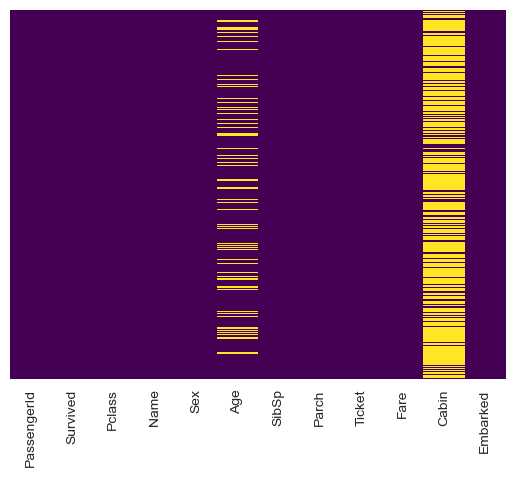

In [4]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# EDA

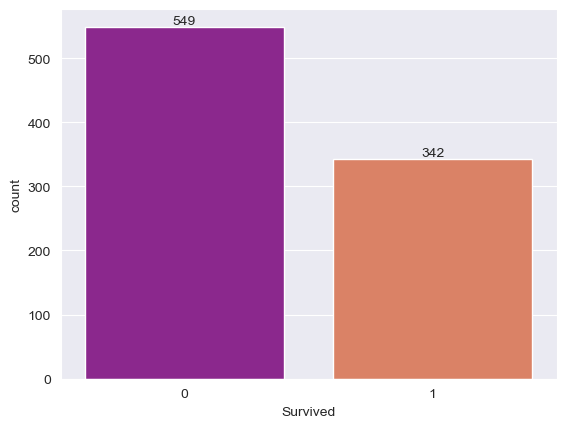

In [5]:
ax = sns.countplot(x = "Survived", data = titanic, palette = "plasma")

for bars in ax.containers:
    ax.bar_label(bars)

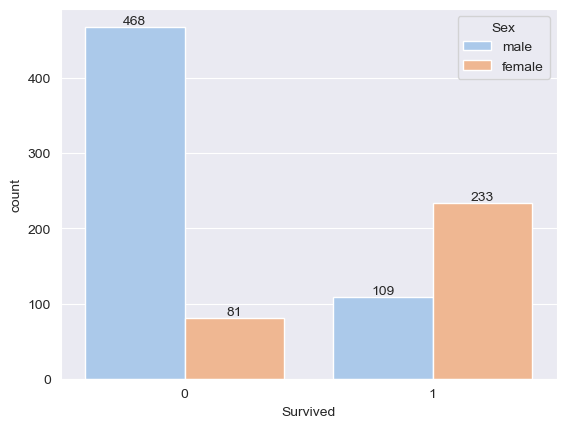

In [6]:
ax = sns.countplot(x = "Survived",hue = "Sex", data = titanic, palette = "pastel")

for bars in ax.containers:
    ax.bar_label(bars)

In [7]:
titanic["Pclass"] = titanic["Pclass"].astype("string")

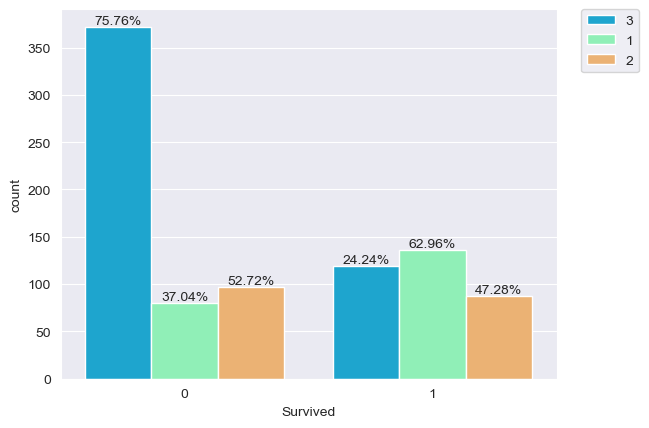

In [8]:
ax = sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')


for bars in ax.containers:
    total = sum(bars.datavalues)
    labels = [f'{(value/total)*100:.2f}%' for value in bars.datavalues]
    ax.bar_label(bars,labels = labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


C:\Users\HN362WS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


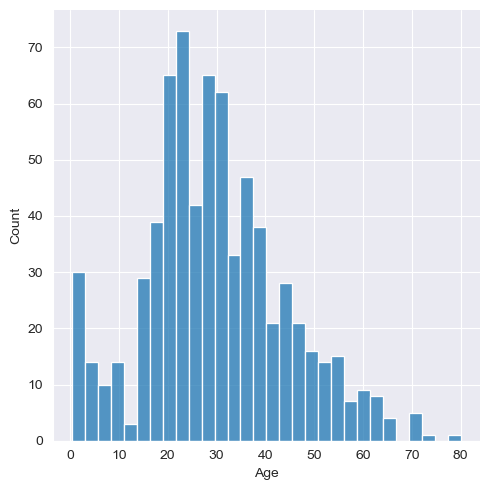

In [11]:
sns.displot(titanic["Age"].dropna(), kde = False,bins = 30)

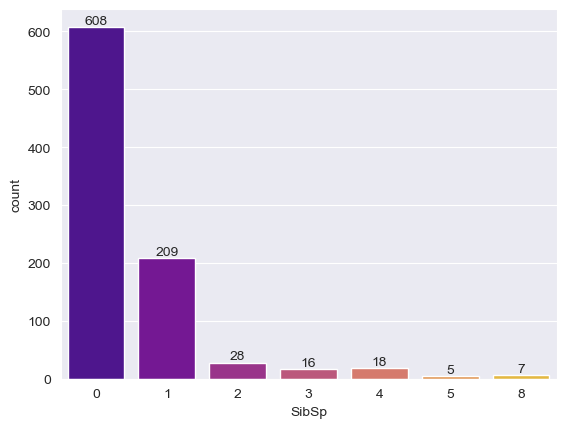

In [12]:
ax = sns.countplot(x = "SibSp", data = titanic, palette="plasma")

for bars in ax.containers:
    ax.bar_label(bars)

In [13]:
import cufflinks as cf
cf.go_offline()

In [14]:
titanic["Fare"].iplot(kind = "hist", bins = 30, color = "green")

# Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

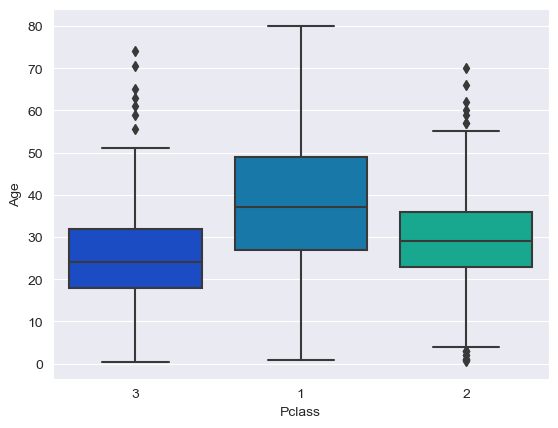

In [16]:
sns.boxplot(x = "Pclass", y = "Age", data = titanic, palette="winter")

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
titanic["Age"] = titanic[["Age","Pclass"]].apply(impute_age,axis = 1)

C:\Users\HN362WS\AppData\Local\Temp\ipykernel_24100\1895736034.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\HN362WS\AppData\Local\Temp\ipykernel_24100\1895736034.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

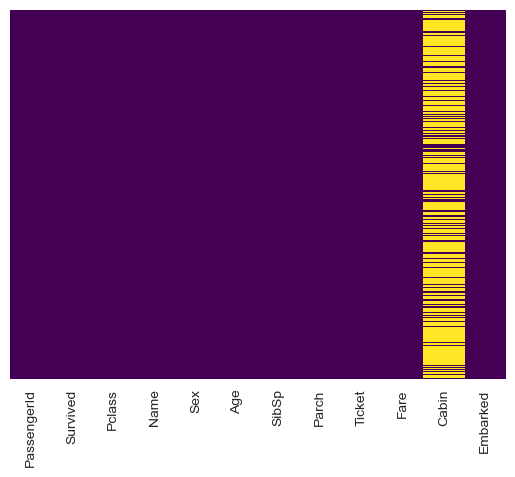

In [19]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
titanic.drop("Cabin", axis = 1, inplace=True)

# Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [23]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C


In [22]:
titanic["Sex"] = titanic["Sex"].map({"male": 0, "female": 1})

In [24]:
sex = pd.get_dummies(titanic["Sex"],drop_first=True).astype(int)

In [25]:
sex

,1
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [26]:
embark = pd.get_dummies(titanic["Embarked"],drop_first=True).astype(int)

In [27]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [28]:
titanic = pd.concat([titanic,sex,embark],axis=1)

titanic

In [31]:
titanic.rename(columns=({1:"Male"}),inplace = True)

In [33]:
titanic.drop(["Sex","Embarked","Name","Ticket"],axis = 1, inplace = True)

In [44]:
titanic.drop("PassengerId",axis = 1, inplace = True)

# Building a Logistic Regression model

In [68]:
X = titanic.drop("Survived",axis = 1)
y = titanic["Survived"]

# Train Test Split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training and Predicting

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logmodel = LogisticRegression()

In [73]:
logmodel.fit(X_train,y_train)


C:\Users\HN362WS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [74]:
predictions = logmodel.predict(X_test)

# Evaluation

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       154
           1       0.78      0.66      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268



In [78]:
print(confusion_matrix(y_test,predictions))

[[133  21]
 [ 39  75]]
